# Functions statements

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from __future__ import division

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

## Video Game Sales EDA

## Questions for Analysis
* What are the top 10 selling games for each platform?
* What are some of the differences between the Sales Markets?
* What dummy variables can we create?
* How can we view relative sales?

In [3]:
df = pd.read_csv("games.csv")
df.drop(['Unnamed: 0'],axis =1 ,inplace = True)
print ("Shape of Dataframe: " + str(df.shape))
df

Shape of Dataframe: (18749, 10)


,name,developer,platform,genre,total_sales,na_sales,eu_sales,japan_sales,other_sales,release_year
0,Just Dance 4,Ubisoft,Wii,Music,6.89,4.05,2.21,0.01,0.62,2012
1,Just Dance 2014,Ubisoft Paris,Wii,Music,3.89,1.91,1.66,0.01,0.33,2013
2,Just Dance 2015,Ubisoft Paris,Wii,Music,2.09,1.00,0.91,0.01,0.18,2014
3,Dance Central 2,Harmonix Music Systems,X360,Music,2.04,1.45,0.41,0.01,0.16,2011
4,Guitar Hero Live,FreeStyleGames,PS4,Music,1.21,0.52,0.49,0.01,0.20,2015
...,...,...,...,...,...,...,...,...,...,...
18744,Daredevil,Griptonite Games,GBA,Action,0.00,0.00,0.00,0.01,0.01,2003
18745,Silent Hill: Homecoming,Double Helix Games,PC,Action,0.00,0.01,0.00,0.01,0.00,2008
18746,Hulk,Radical Entertainment,PC,Action,0.00,0.01,0.00,0.01,0.01,2003
18747,Of Orcs and Men,Cyanide Studio,X360,Action,0.00,0.01,0.00,0.01,0.01,2012


## Univariate Analysis
Let's take a look at our platforms and the number of total sales for each.

Text(0.5, 0, 'platform')

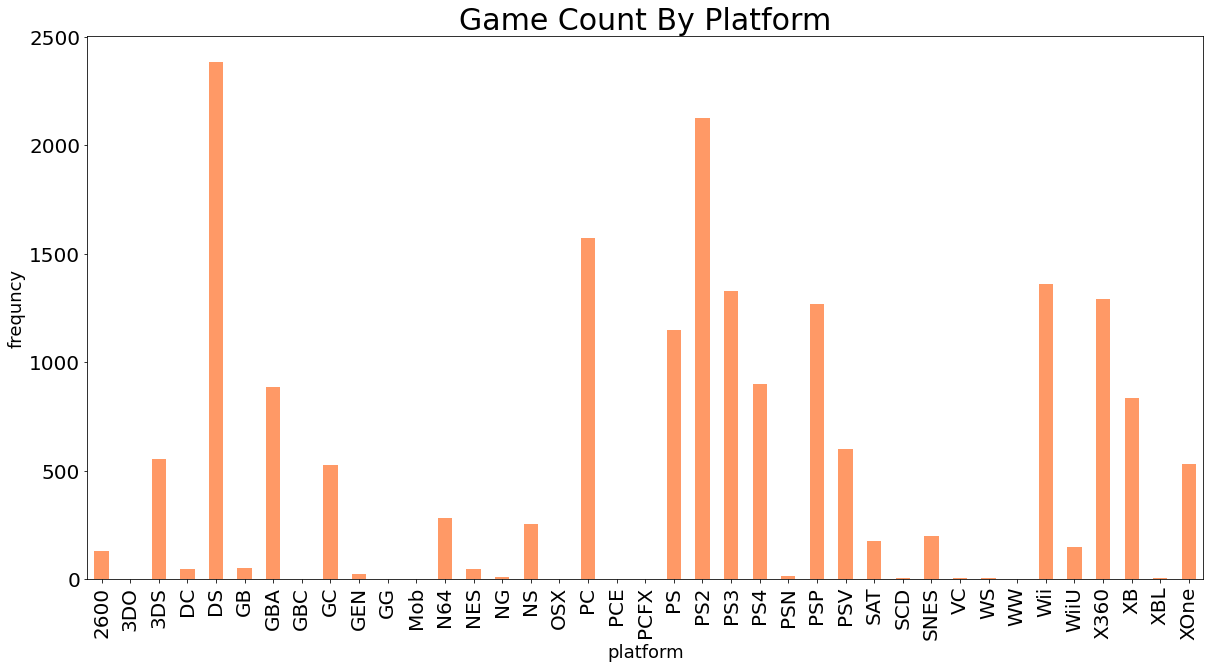

In [5]:
ax9 = df.groupby('platform').size().plot.bar(color = '#ff9966' ,by='platform',fontsize=20, title='Game Count By Platform',figsize=(20,10))

ax9.title.set_size(30)
ax9.set_ylabel("frequncy",fontsize=18)
ax9.set_xlabel("platform",fontsize=18)

Our plot above gives us an idea of how many games per console our data contains but we immediately noticed that our platforms include handhelds, consoles, and the PC. so we group these and see what our distribution looks like.

Text(0.5, 0, 'platform_type')

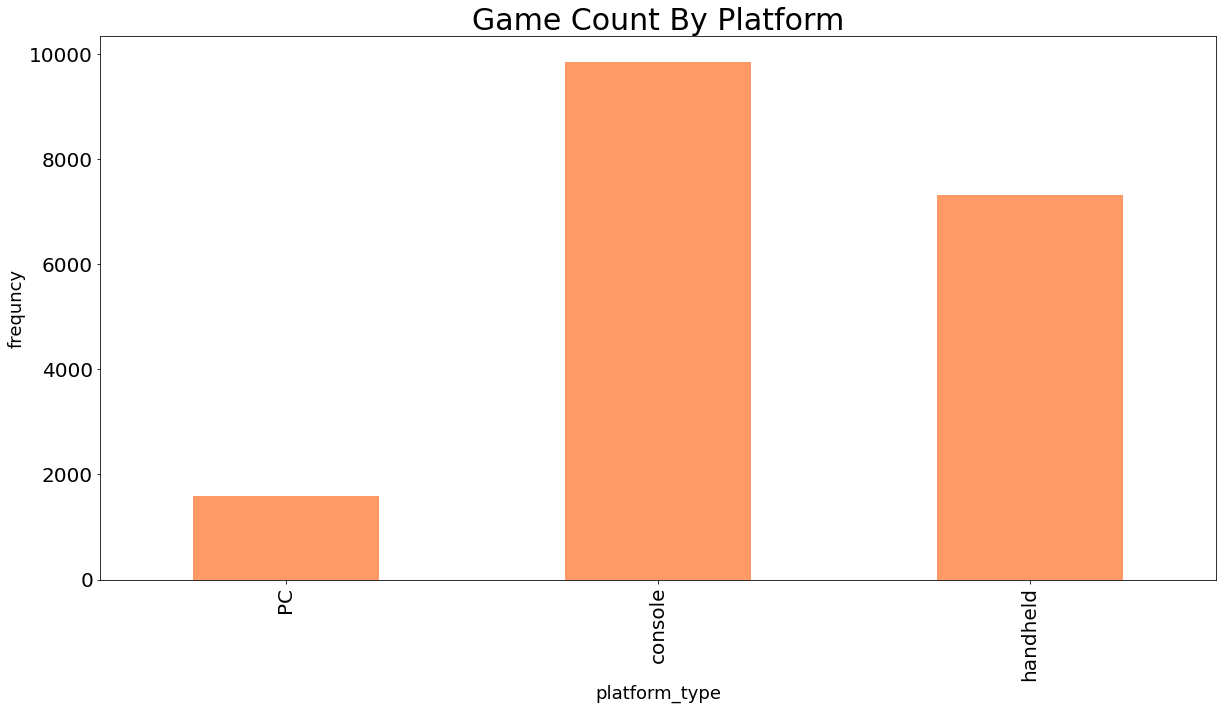

In [6]:
# creating a dictionary to map console to console type
platform_type = {'2600':"console",'3DO':"console",'3DS':"handheld",'DC':"console",'DS':"handheld",
                 'GB':"handheld",'GBA':"handheld",'GBC':"handheld",'GC':"console",'GEN':"console",
                 'GG':"console",'Mob':"handheld",'N64':"console",'NES':"console",'NG':"console",
                 'NS':"handheld",'OSX':"PC",'PC':"PC",'PCE':"console",'PCFX':"console",'PS':"handheld",
                 'PS2':"console",'PS3':"console",'PS4':"console",'PSN':"PC",'PSP':"handheld",'PSV':"handheld",
                 'SAT':"console",'SCD':"handheld",'SNES':"console",'VC':"console",'Wii':"console",
                 'WiiU':"handheld",'WS':"handheld",'WW':"console",'X360':"console",'XB':"console",
                 'XBL':"console",'XOne':"console"}
                


df["platform_type"] = df["platform"].map(lambda x: platform_type[x])
# plot_bar(df, "platform_type", "Game Count by Platform Type")
ax8 = df.groupby('platform_type').size().plot.bar(color = '#ff9966' ,by='platform_type',fontsize=20, title='Game Count By Platform',figsize=(20,10))
ax8.title.set_size(30)
ax8.set_ylabel("frequncy",fontsize=18)
ax8.set_xlabel("platform_type",fontsize=18)

We can see that there are about ~9,500 more console games than PC releases in our data.
we will see later how these compare in sales figures.

Text(0, 0.5, 'no_of_games')

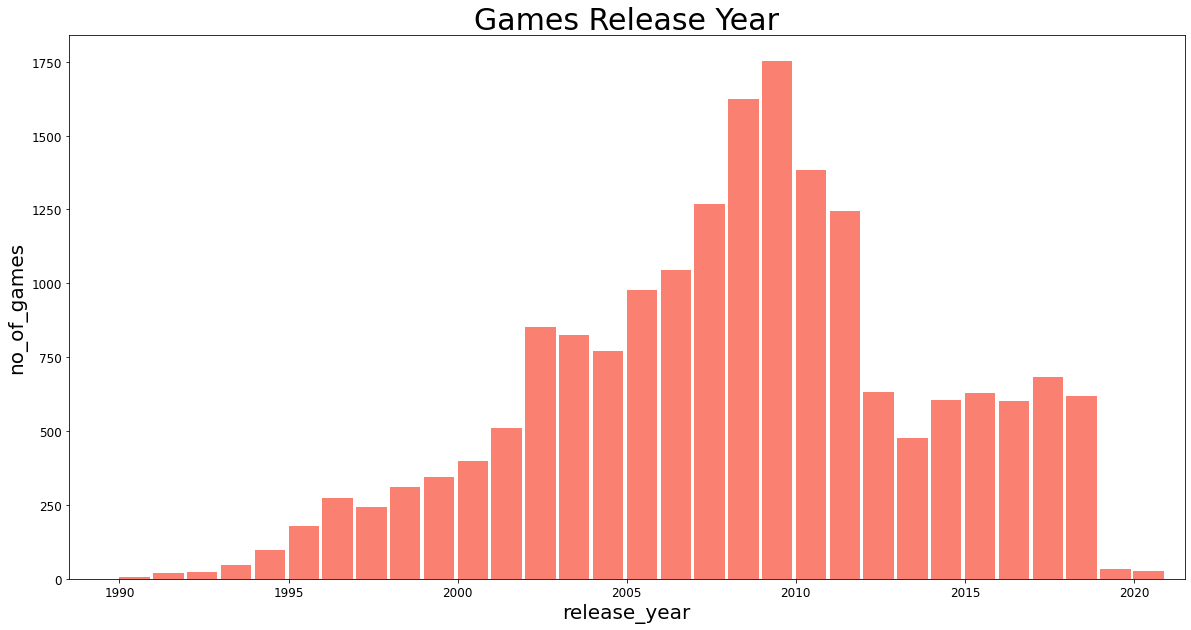

In [7]:
number_of_bins = int(df.release_year.max() - df.release_year.min())
title = "Games Release Year"

df["release_year"].plot.hist(figsize=(20,10),fontsize=12,bins=number_of_bins,title=title,range=[1990,2020],width=0.9, color = 'salmon').title.set_size(30)

plt.xlabel('release_year',fontsize=20)
plt.ylabel('no_of_games',fontsize=20)

It looks like our data has left skew, indicating that there are more game releases in recent history ~(2005 - 2010)

Text(0, 0.5, 'no_of_games')

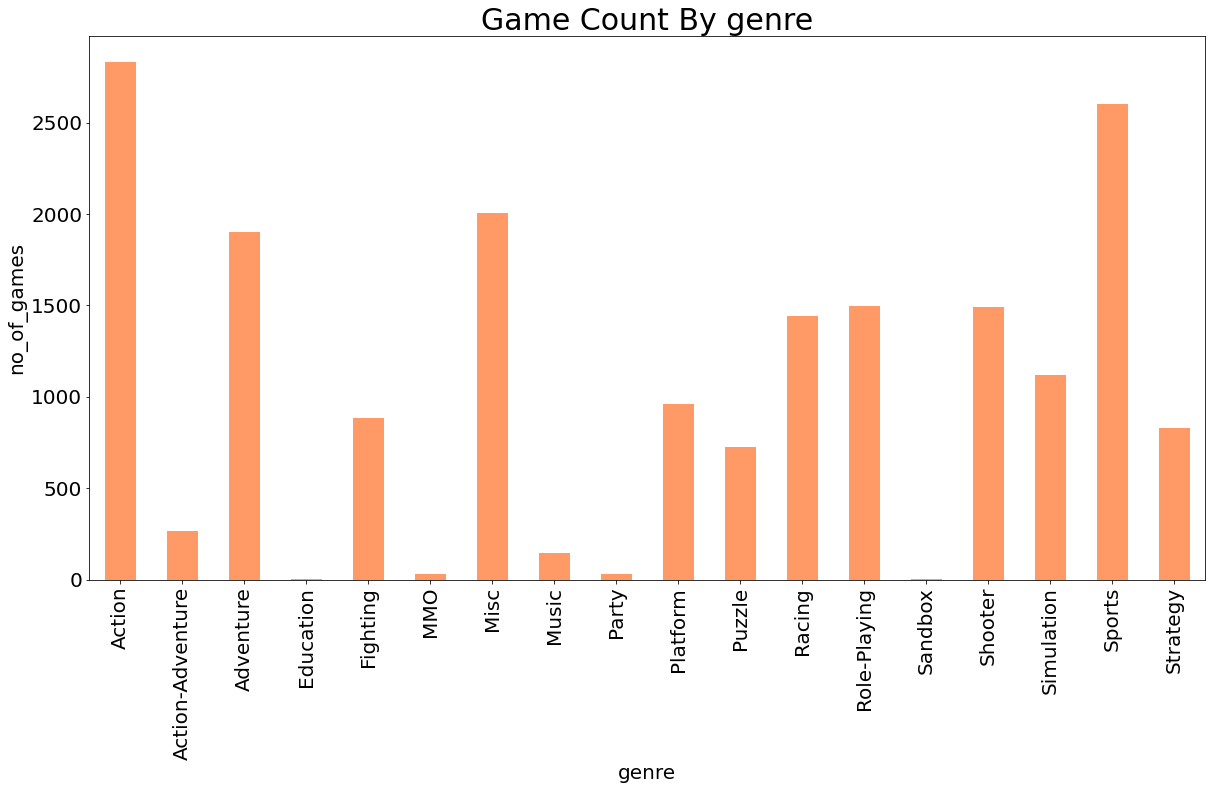

In [8]:

df.groupby('genre').size().plot.bar(color = '#ff9966' ,by='genre',fontsize=20, title='Game Count By genre',figsize=(20,10)).title.set_size(30)

plt.xlabel('genre',fontsize=20)
plt.ylabel('no_of_games',fontsize=20)

It looks like Action games appear the most. But we not sure who or how a genre is decided. Would a game like "Adventure Time: Explore the Dungeon Because I Don't Know!" be "Action", "Adventure", or "Action-Adventure"? (fyi- most Adventure Time games are labeled as Action with some marked as Adventure)


In [9]:
df[df.name.str.contains("Adventure Time")].sort_values(by="release_year")

,name,developer,platform,genre,total_sales,na_sales,eu_sales,japan_sales,other_sales,release_year,platform_type
294,Adventure Time: Explore the Dungeon Because I...,Way Forward,3DS,Action-Adventure,0.16,0.10,0.04,0.01,0.01,2013,handheld
330,Adventure Time: Explore the Dungeon Because I...,Way Forward,X360,Action-Adventure,0.08,0.03,0.04,0.01,0.01,2013,console
349,Adventure Time: Explore the Dungeon Because I...,Way Forward,PS3,Action-Adventure,0.05,0.02,0.02,0.01,0.01,2013,console
356,Adventure Time: Explore the Dungeon Because I...,Way Forward,WiiU,Action-Adventure,0.04,0.02,0.02,0.01,0.00,2013,handheld
387,Adventure Time: The Secret of the Nameless,Way Forward Technologies,3DS,Action-Adventure,0.02,0.01,0.01,0.01,0.00,2014,handheld
394,Adventure Time: The Secret of the Nameless Ki...,Way Forward,X360,Action-Adventure,0.01,0.01,0.01,0.01,0.00,2014,console
1109,Adventure Time: The Secret of the Nameless Ki...,WayForward Technologies,3DS,Adventure,0.08,0.00,0.08,0.01,0.00,2014,handheld
2186,Adventure Time: The Secret of the Nameless Ki...,WayForward Technologies,PS3,Adventure,0.00,0.00,0.01,0.01,0.00,2014,console
17551,Adventure Time: Finn & Jake Investigations,Vicious Cycle,3DS,Action,0.11,0.03,0.06,0.01,0.01,2015,handheld
17478,Adventure Time: Finn & Jake Investigations,Vicious Cycle,PS3,Action,0.12,0.04,0.06,0.01,0.02,2015,console


Text(0.5, 0, 'developer')

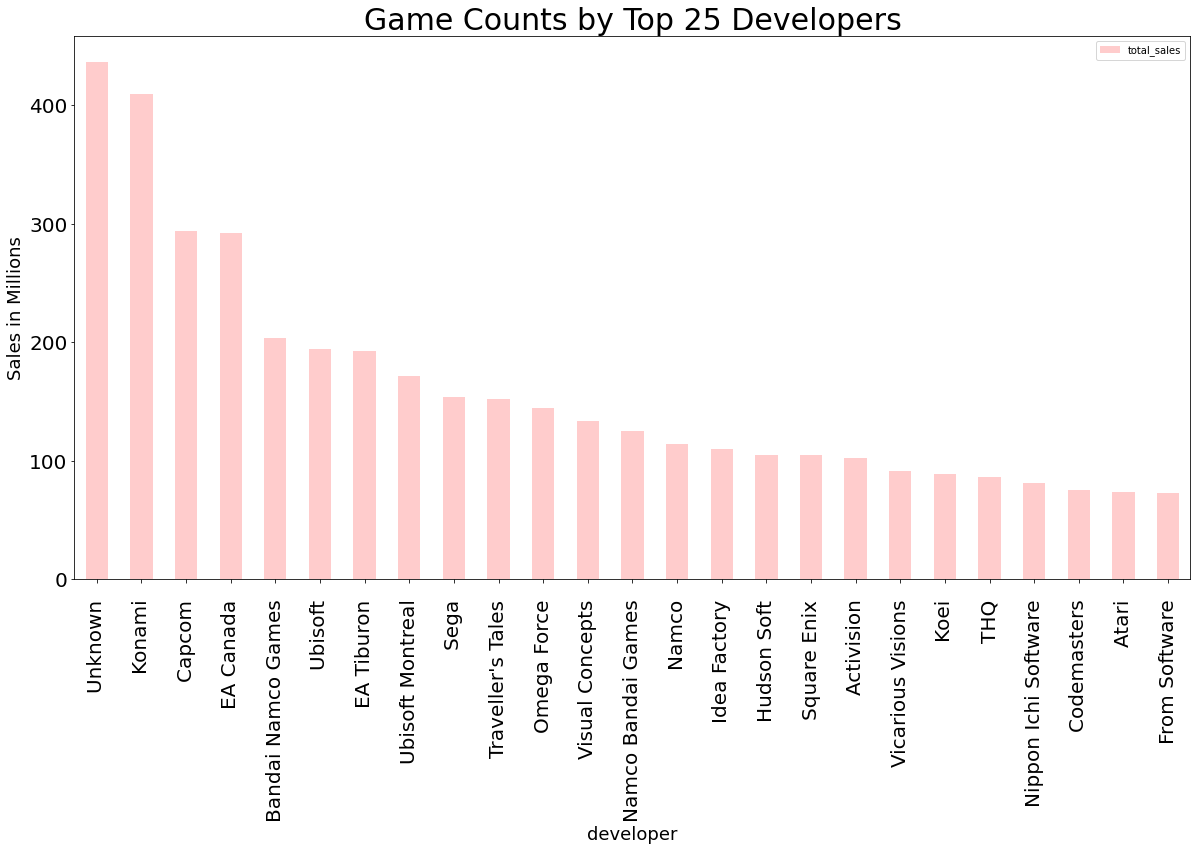

In [10]:
top_publishers = df[["developer", "total_sales"]].groupby("developer").count().sort_values("total_sales", ascending=False).head(25)
top_publishers.plot.bar(title="Game Counts by Top 25 Developers",figsize=(20,10),fontsize=20, color ='#ffcccc'
).title.set_size(30)
plt.ylabel("Sales in Millions",fontsize=18)
plt.xlabel("developer",fontsize=18) 


we have a large "Unknown" developers in our data, but I guess it is no surprise that "Konami" has the most game releases; without looking at our data I am guessing this is due to the sports games it releases for all consoles each year...

Text(0, 0.5, 'Konami')

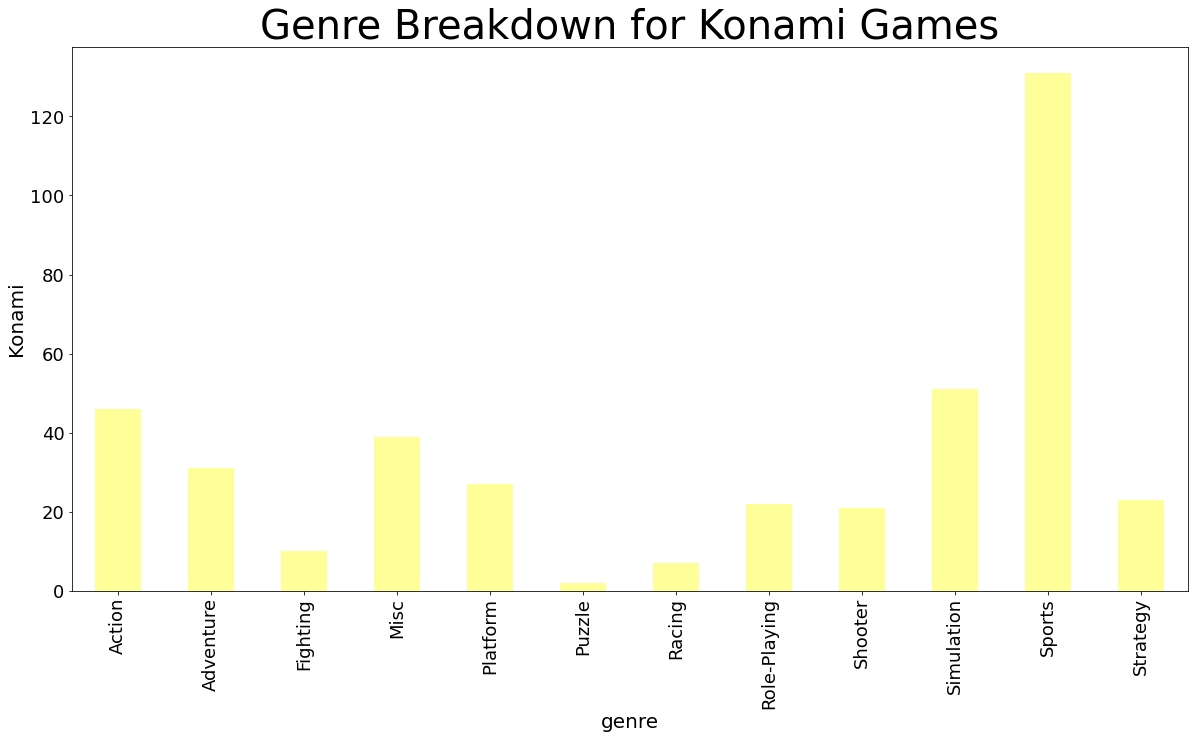

In [11]:
Konami_Games = df.loc[df["developer"] == "Konami  "]
Konami_Games.groupby("genre").count()["total_sales"].plot.bar(fontsize=18,title="Genre Breakdown for Konami Games",color = '#ffff99',figsize=(20,10)).title.set_size(40)
plt.xlabel('genre',fontsize=20)
plt.ylabel('Konami',fontsize=20)

As mentioned above, we can see most of Konami's games fall under the sports genre.

Text(0, 0.5, 'Frequency')

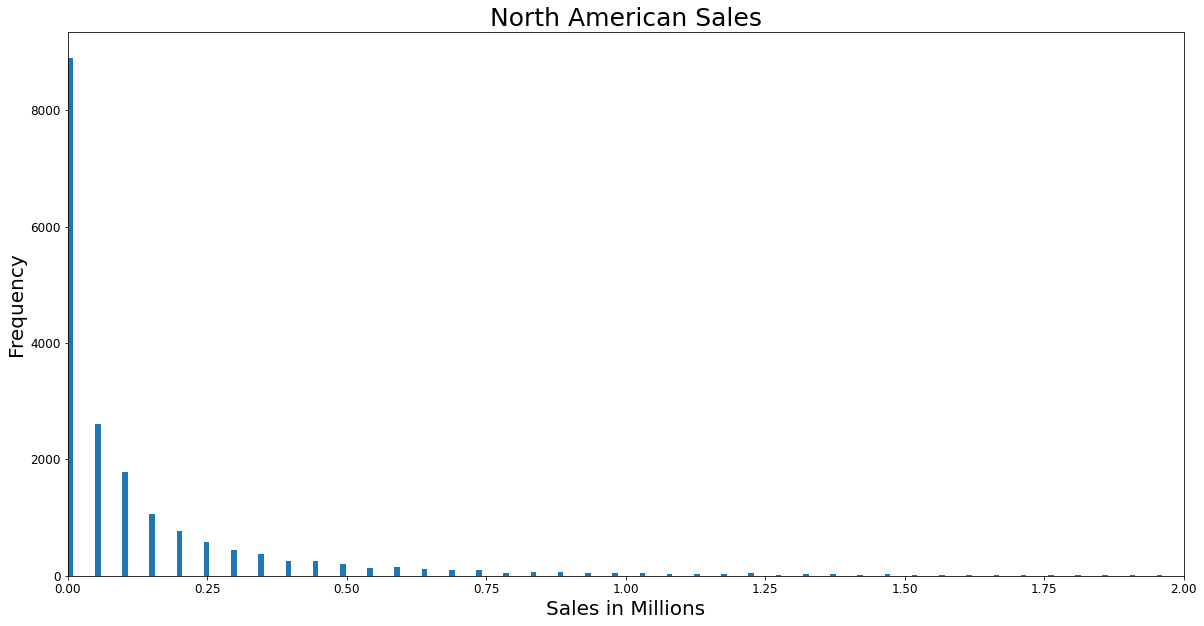

In [12]:
title="North American Sales"
df["na_sales"].plot.hist(bins=200,fontsize=12,width = 0.01, title=title, xlim=(0,2),figsize=(20,10)).title.set_size(25)
plt.xlabel('Sales in Millions',fontsize=20)
plt.ylabel('Frequency',fontsize=20)

Text(0, 0.5, 'Frequency')

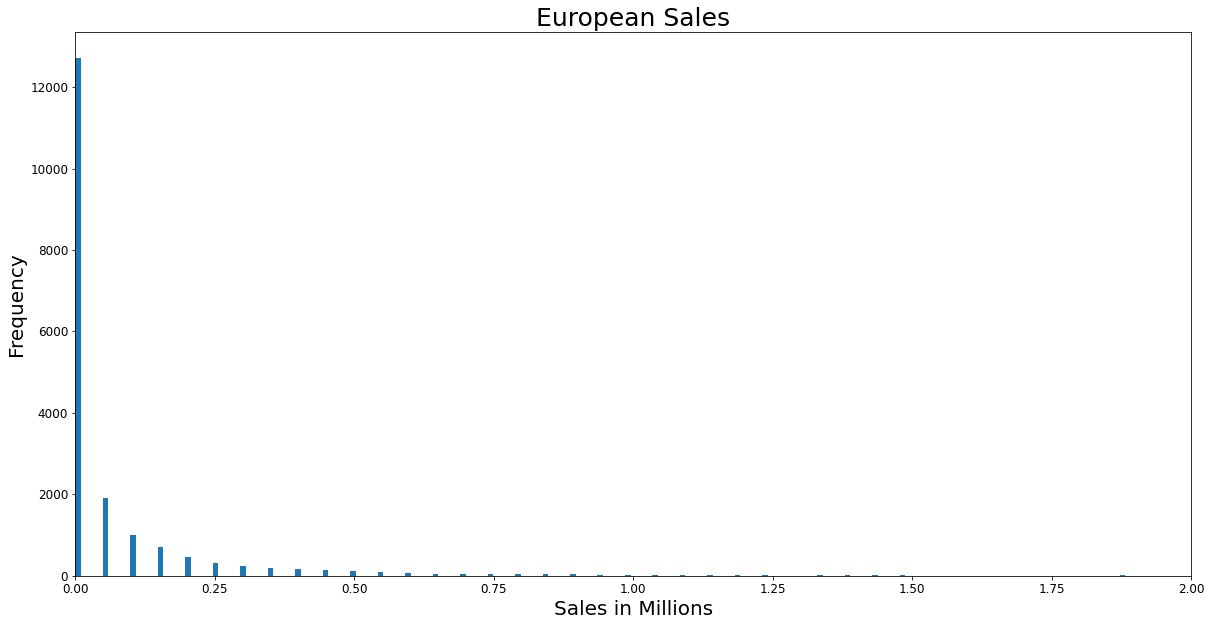

In [13]:
title="European Sales"
df["eu_sales"].plot.hist(bins=200,fontsize=12, title=title, xlim=(0,2),width =0.01,figsize=(20,10)).title.set_size(25)
plt.xlabel('Sales in Millions',fontsize=20)
plt.ylabel('Frequency',fontsize=20)





Text(0, 0.5, 'Frequency')

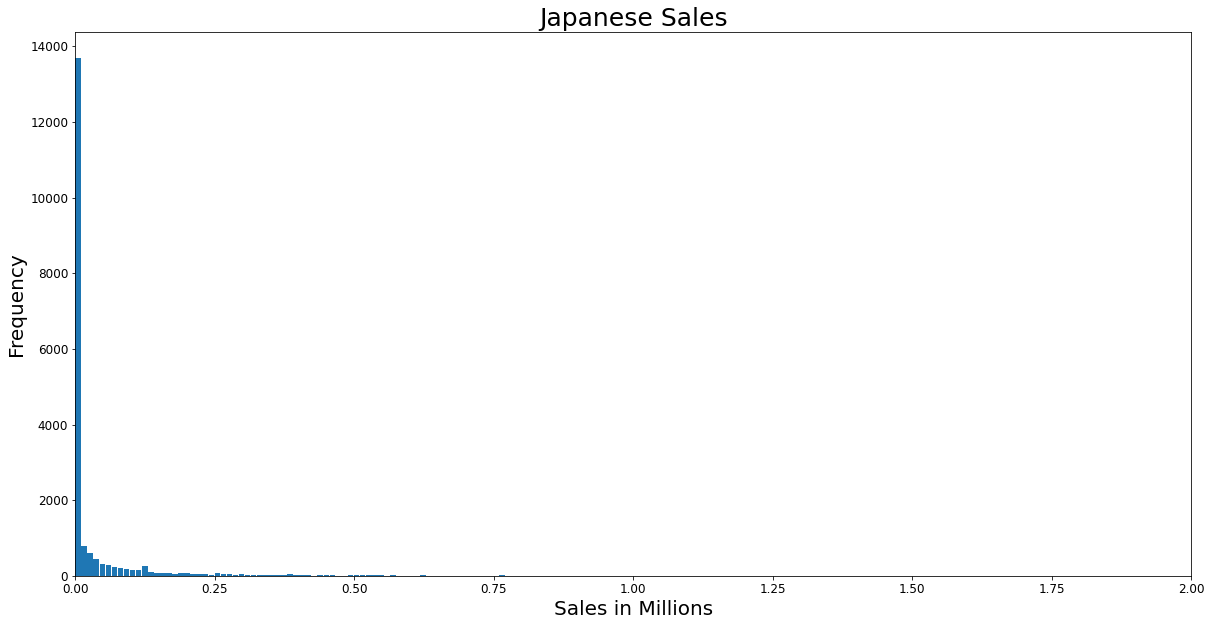

In [14]:
title="Japanese Sales"
df["japan_sales"].plot.hist(bins=200,fontsize=12, title=title,width = 0.01, xlim=(0,2),figsize=(20,10)).title.set_size(25)
plt.xlabel('Sales in Millions',fontsize=20)
plt.ylabel('Frequency',fontsize=20)

It looks like the NA market is the largest as many of the EU,JP, and Other Sales figures do not exceed the 1,200,000 copies sold mark

Text(0, 0.5, 'Frequency')

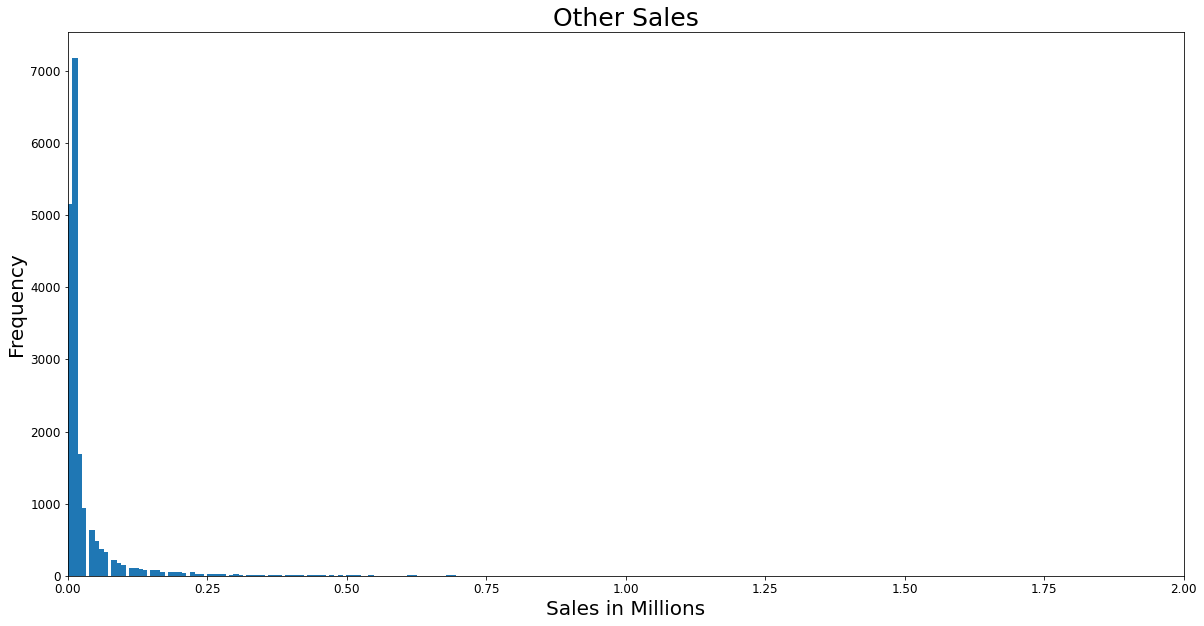

In [15]:
title="Other Sales"
df["other_sales"].plot.hist(bins=400,fontsize=12, title=title, xlim=(0,2),width =0.01,figsize=(20,10)).title.set_size(25)
plt.xlabel('Sales in Millions',fontsize=20)
plt.ylabel('Frequency',fontsize=20)


Text(0, 0.5, 'Frequency')

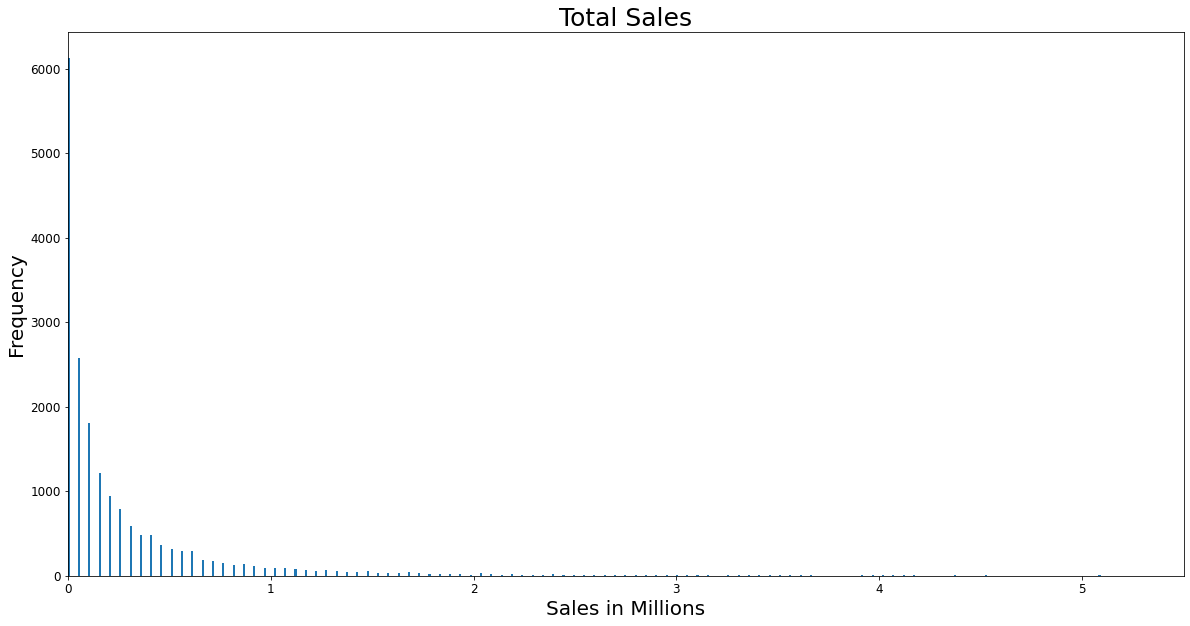

In [16]:
title="Total Sales"
df["total_sales"].plot.hist(bins=400,fontsize=12, title=title, xlim=(0,5.5),width =0.01,figsize=(20,10)).title.set_size(25)
plt.xlabel('Sales in Millions',fontsize=20)
plt.ylabel('Frequency',fontsize=20)

## Bivariate Analysis

Text(0.5, 0, 'platform')

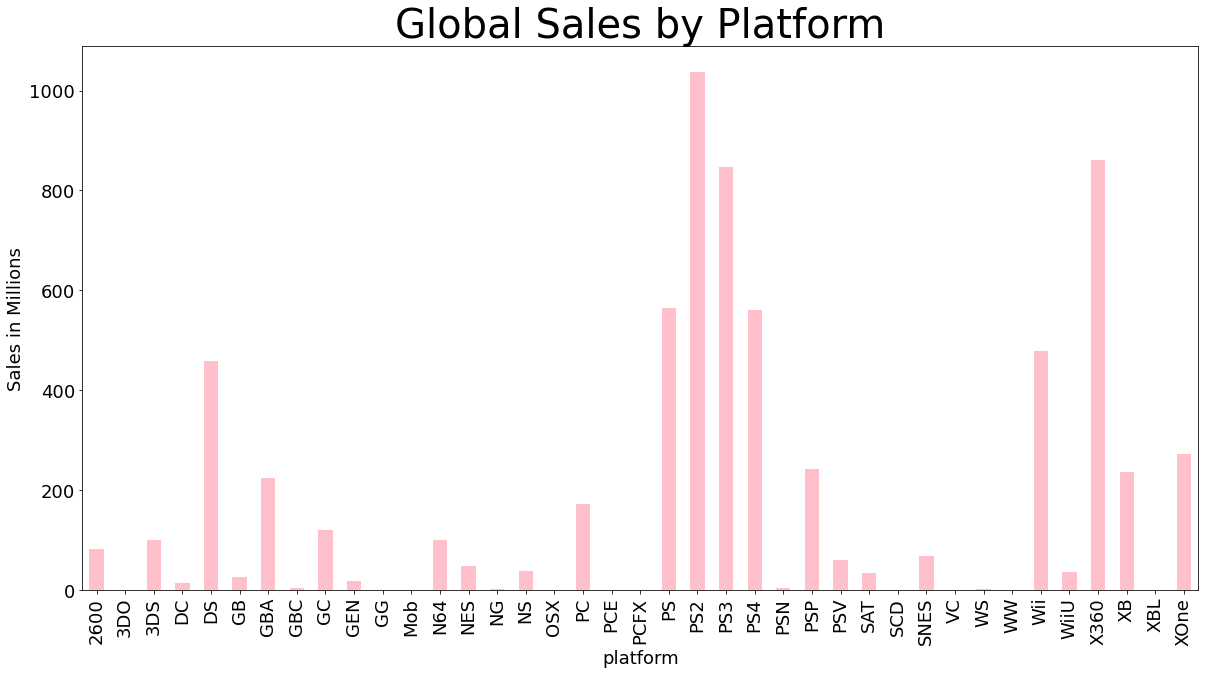

In [19]:
title = "Global Sales by Platform"
ax3 = df.groupby("platform").sum()["total_sales"].plot.bar(title=title,color = 'pink',fontsize=18,figsize=(20,10))
ax3.title.set_size(40)
ax3.set_ylabel("Sales in Millions",fontsize=18)
ax3.set_xlabel("platform",fontsize=18)

It looks like PS2 has the best selling games, where 'best selling' is the total number of sales.

(14.0, 43.0)

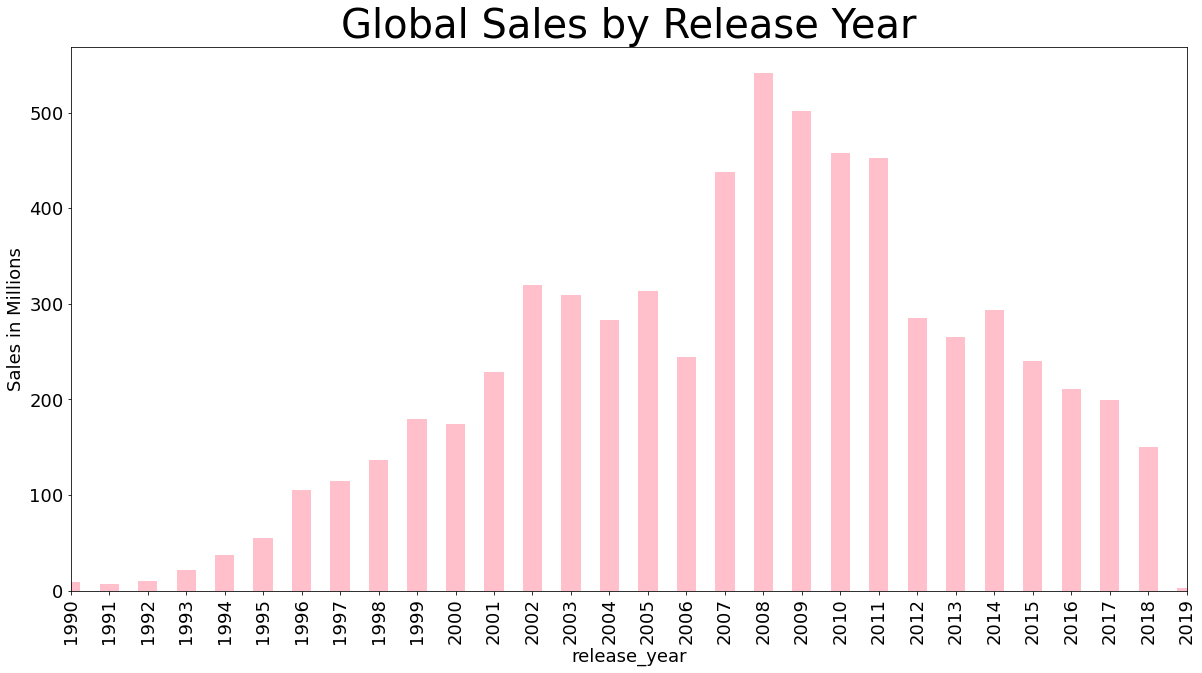

In [20]:
title = "Global Sales by Release Year"


ax4 = df.groupby("release_year").sum()["total_sales"].plot.bar(fontsize=18,color = 'pink',title=title,figsize=(20,10))
ax4.title.set_size(40)
ax4.set_ylabel("Sales in Millions",fontsize=18)
ax4.set_xlabel("release_year",fontsize=18)

plt.xlim(14,43)


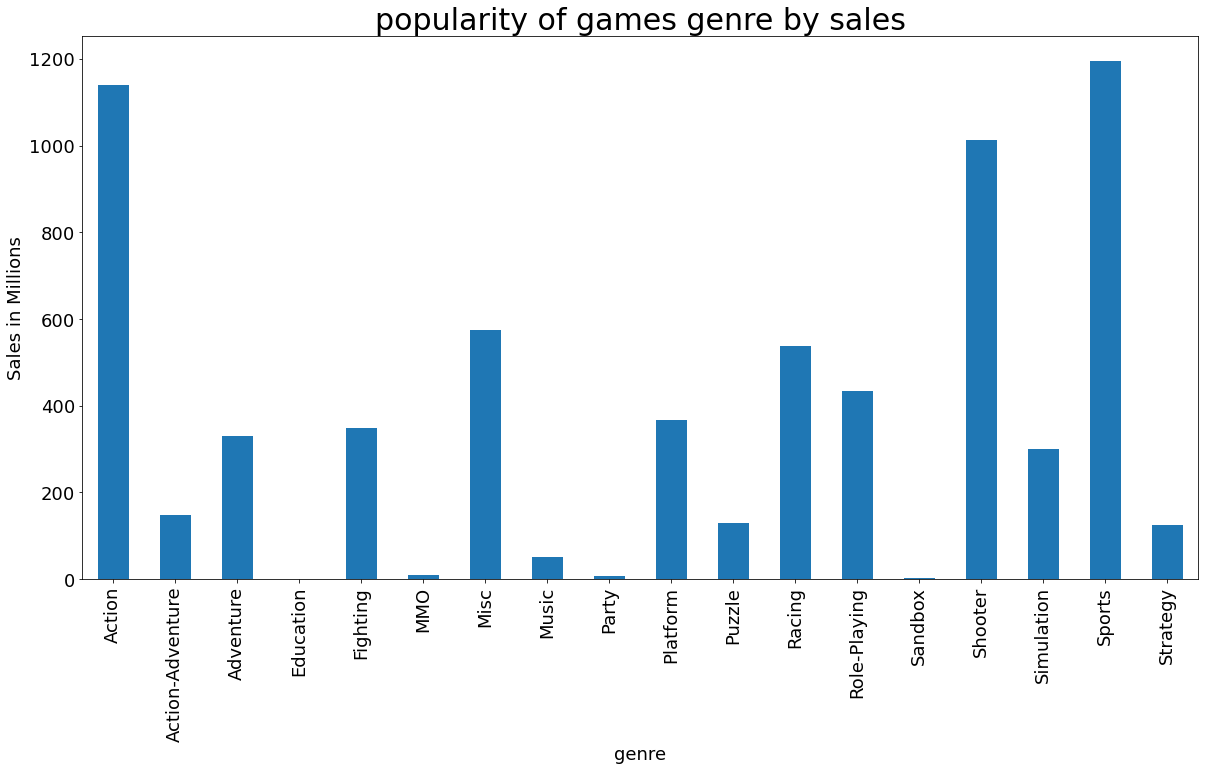

In [48]:
title = "popularity of games genre by sales"
ax1 = df.groupby("genre").sum()["total_sales"].plot.bar(title=title,figsize=(20,10),fontsize=18)
ax1.set_ylabel("Sales in Millions",fontsize=18)
ax1.set_xlabel("genre",fontsize=18)
ax1.title.set_size(30)


Text(0.5, 0, 'developer')

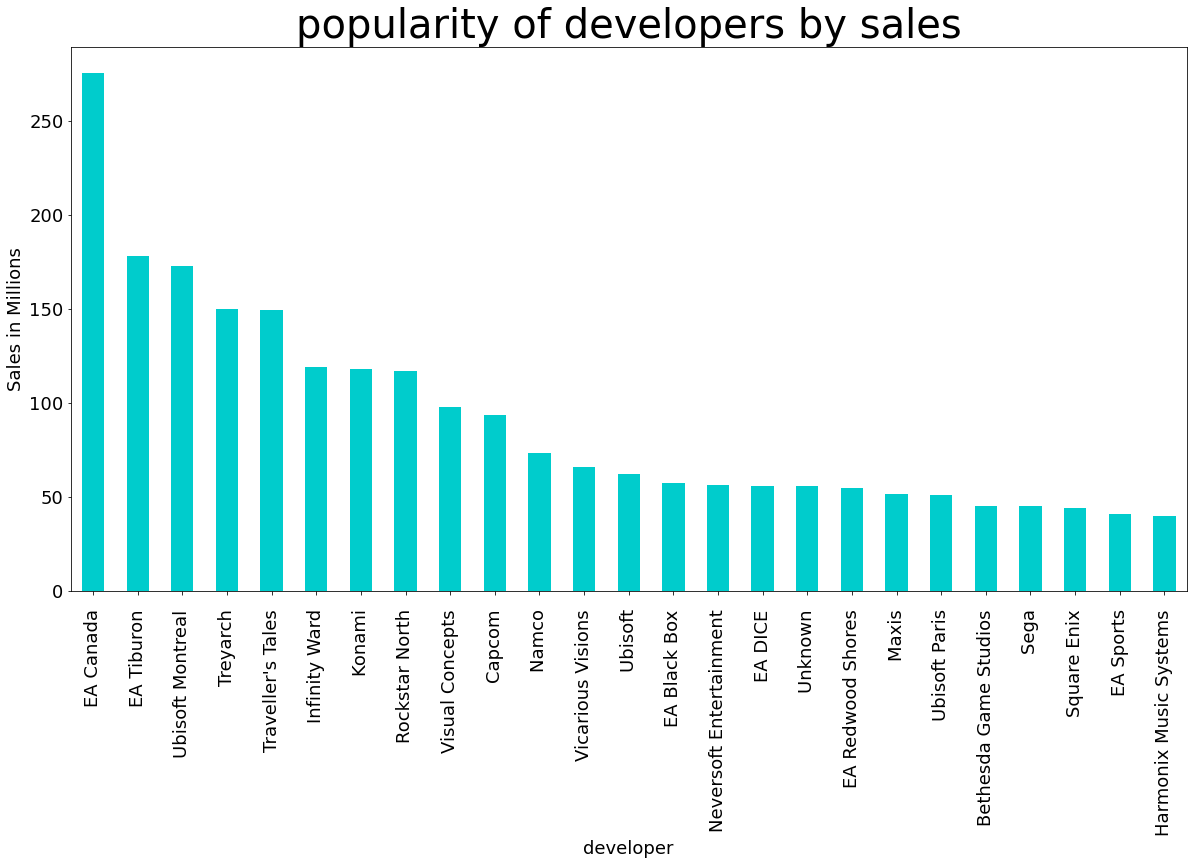

In [47]:
title = "popularity of developers by sales"
ax5 = df.groupby("developer")\
    .sum()\
    .sort_values(by="total_sales", ascending=False)\
    .head(25)["total_sales"]\
    .plot.bar(title=title, color = '#00cccc',figsize=(20,10),fontsize=18)
    
ax5.title.set_size(40)
ax5.set_ylabel("Sales in Millions",fontsize=18)
ax5.set_xlabel("developer",fontsize=18)





As we saw above NA market is the largest so EA Canada that canada is in NA has the most sales.

In [23]:
# Computing what percentage of sales EA Canada accounts for in total global sales
sales_by_publisher = df.groupby("developer").sum()["total_sales"].sort_values(ascending=False)
sales_by_publisher["EA Canada  "]/sales_by_publisher.sum() * 100

4.106865541734842

In [24]:
# Computing what percentage of Games EA Canada accounts for in our set
df.loc[df.developer == "EA Canada  ", "total_sales"].count()/len(df) * 100

1.5574163955410956

EA Canada accounts for 1.55% of our games in this dataset, yet captures 25% of our total global game sales

Text(0, 0.5, 'platform_type')

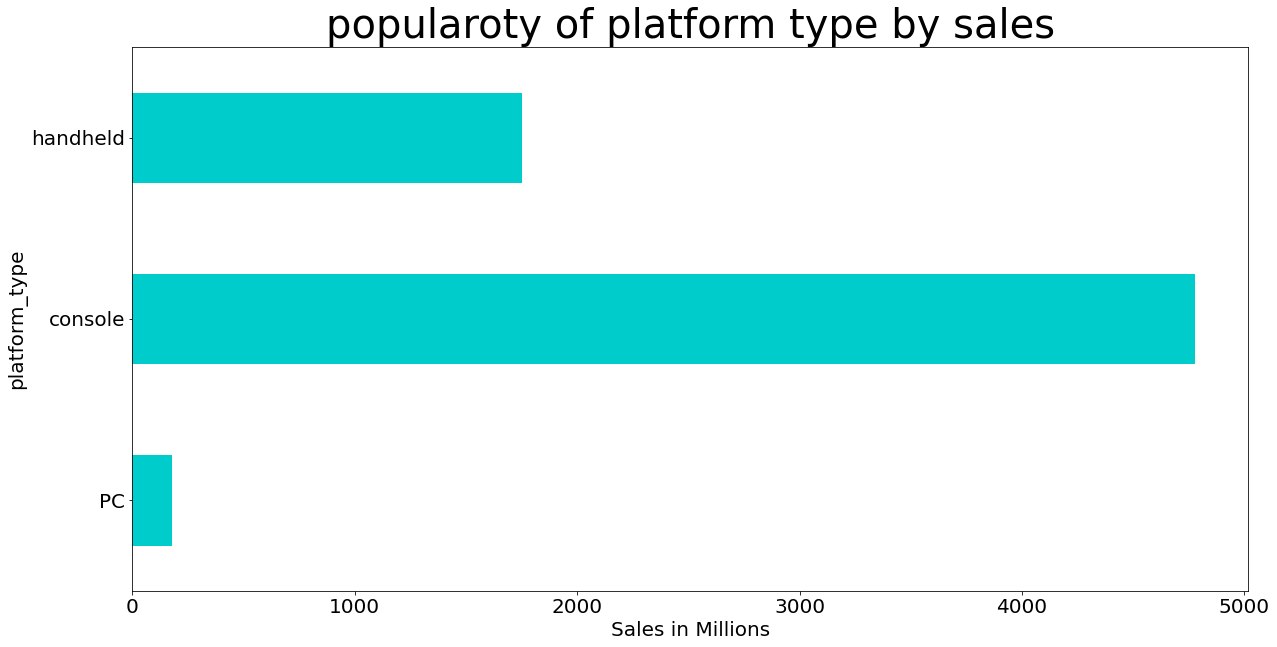

In [46]:
title="popularoty of platform type by sales"
ax7 = df.groupby("platform_type").sum()["total_sales"].plot.barh(title=title,figsize=(20,10),fontsize=20,color = '#00cccc').title.set_size(40)
plt.xlabel('Sales in Millions',fontsize=20)
plt.ylabel('platform_type',fontsize=20)


And as we can see above, console games appear to sell the most

## Multivariate Analysis

Ideas:

* Stacked bar charts from examples above
* What are each top publishers best selling games
* What are the best selling consoles
* Why was 2008 such a good video game year?

Trying and visualize the best selling consoles by platform type (Which console has the most games, by platform type)

(0.0, 12000.0)

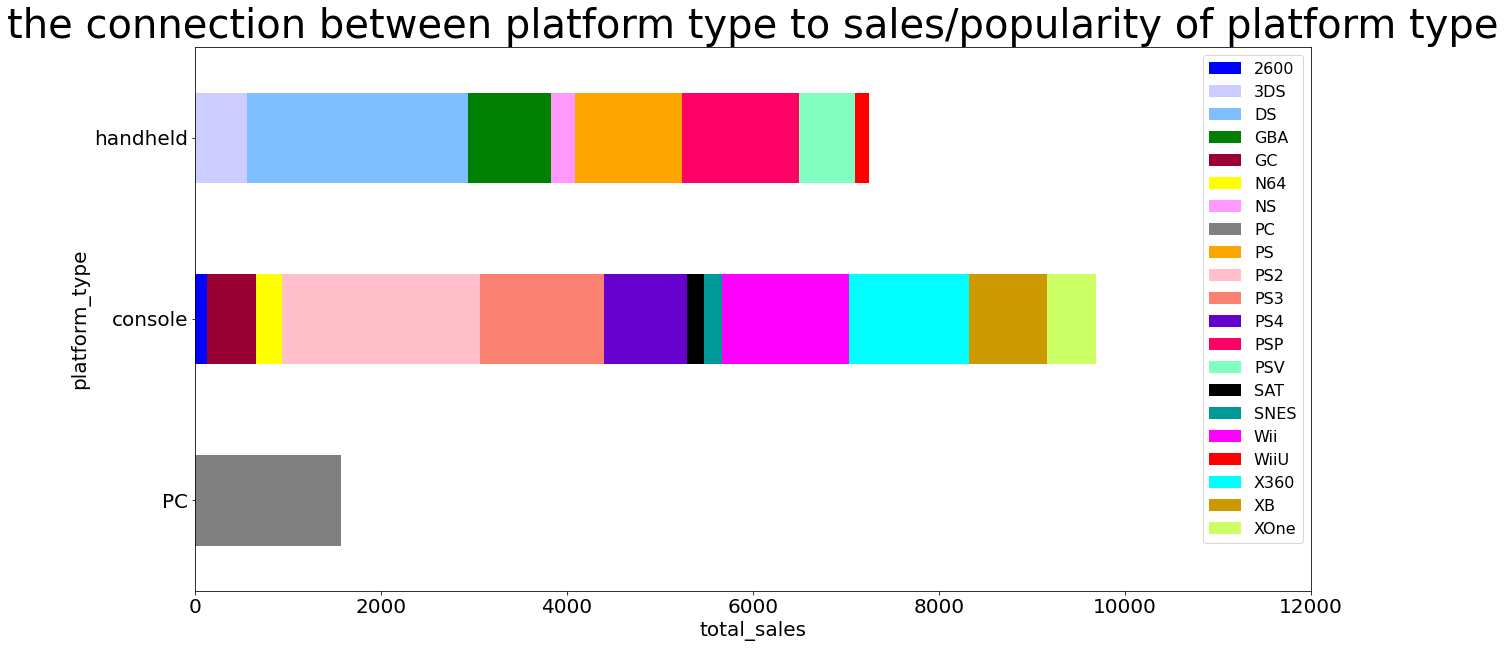

In [44]:
console_count=df.groupby("platform").count()["total_sales"]
console_count = console_count[console_count > 55]
top_consoles = df[df.platform.isin(list(console_count.keys()))]

top_consoles.groupby(["platform_type", "platform"]).count()["total_sales"]\
    .unstack("platform").fillna(0)\
    .plot.barh(stacked=True,figsize=(20,10),fontsize=20,title = "the connection between platform type to sales/popularity of platform type",color=['blue','#ccccff','#80bfff',
                                                                                            'green','#990033', 'yellow','#ff99ff','grey','orange',
                                                                                            'pink','salmon','#6600cc','#ff0066','#80ffbf','black',
                                                                                            '#009999','Fuchsia','red','Aqua','#cc9900','#ccff66']).title.set_size(40)
plt.xlabel('total_sales',fontsize=20)
plt.ylabel('platform_type',fontsize=20)
plt.legend(fontsize=16)
plt.xlim(0,12000)

(0.0, 6050.0)

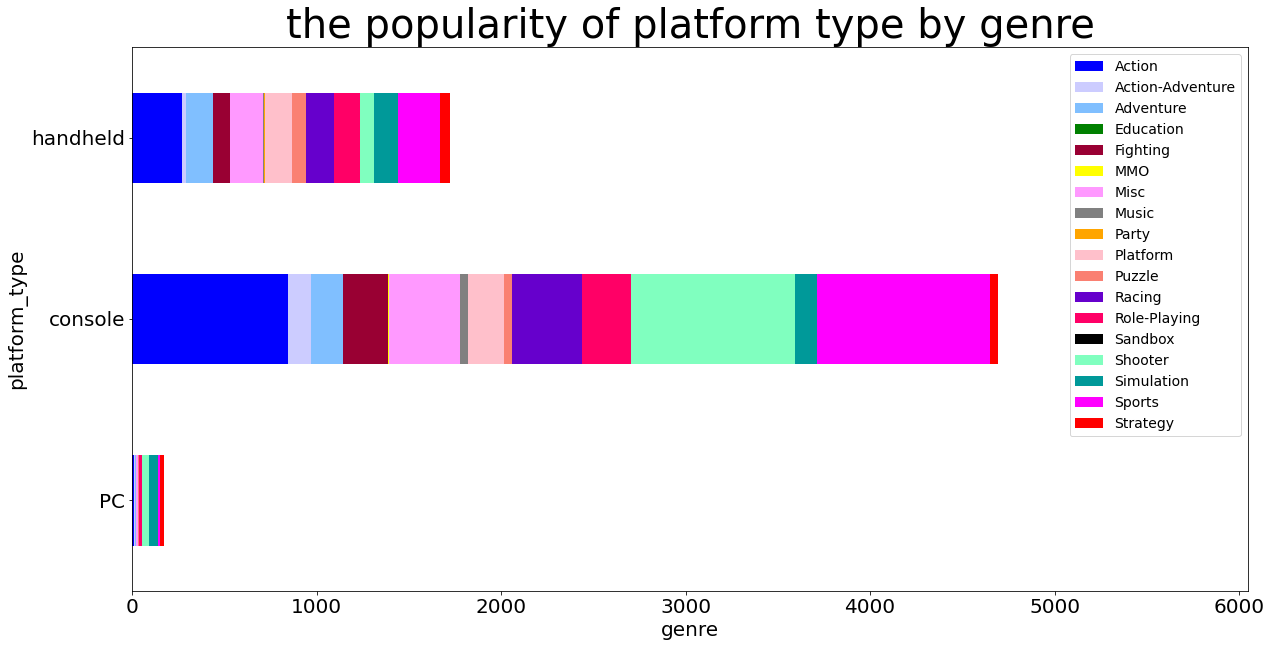

In [42]:
#קשר בין סוג פלטפורמה לזאנר
top_consoles\
    .groupby(["platform_type", "genre"])\
    .sum()["total_sales"]\
    .unstack("genre")\
    .fillna(0)\
    .plot.barh(stacked=True,figsize=(20,10),fontsize=20,title = 'the popularity of platform type by genre',color = ['blue','#ccccff','#80bfff',
                                                                                            'green','#990033', 'yellow','#ff99ff','grey','orange',
                                                                                            'pink','salmon','#6600cc','#ff0066','black','#80ffbf',
                                                                                            '#009999','Fuchsia','red','Aqua','#cc9900','#ccff66']).title.set_size(40)
plt.xlabel('genre',fontsize=20)
plt.ylabel('platform_type',fontsize=20)
plt.legend(fontsize=14)
plt.xlim(0,6050)

The plot is a little messy since we have so many consoles, but if you know which consoles belong to which platform types, then you can distinguish which of the platforms is reponsible for each stack as they are alphabetized. for exmple, the first cyan colored stack in console is PS2, not XB.

In [28]:
df_n = df.copy()
df_n.drop(['name', 'developer','genre','total_sales','platform','other_sales','release_year'], axis='columns', inplace=True)


df_n = df_n.sort_values('japan_sales',ascending = True).groupby('platform_type').tail(100)


df_n = df_n.groupby('platform_type').agg({'na_sales':'sum',
                                           'eu_sales':'sum','japan_sales':'sum'})

df_n['max_sales'] = df_n.max(axis=1)
df_n['max_region'] = df_n.idxmax(axis=1)


df_n

#נעשה גרופביי סוג פלטפורמה ונחבר את המכירות
#קשר בין איזור לסוג פלטפורמה שזה בעצם איפה הפלטפורמה הכי הצליחה שזה איפה היא הכי נמכרה

,na_sales,eu_sales,japan_sales,max_sales,max_region
platform_type,,,,,
PC,2.58,3.96,1.57,3.96,eu_sales
console,34.20,44.55,87.49,87.49,japan_sales
handheld,10.41,7.80,77.38,77.38,japan_sales


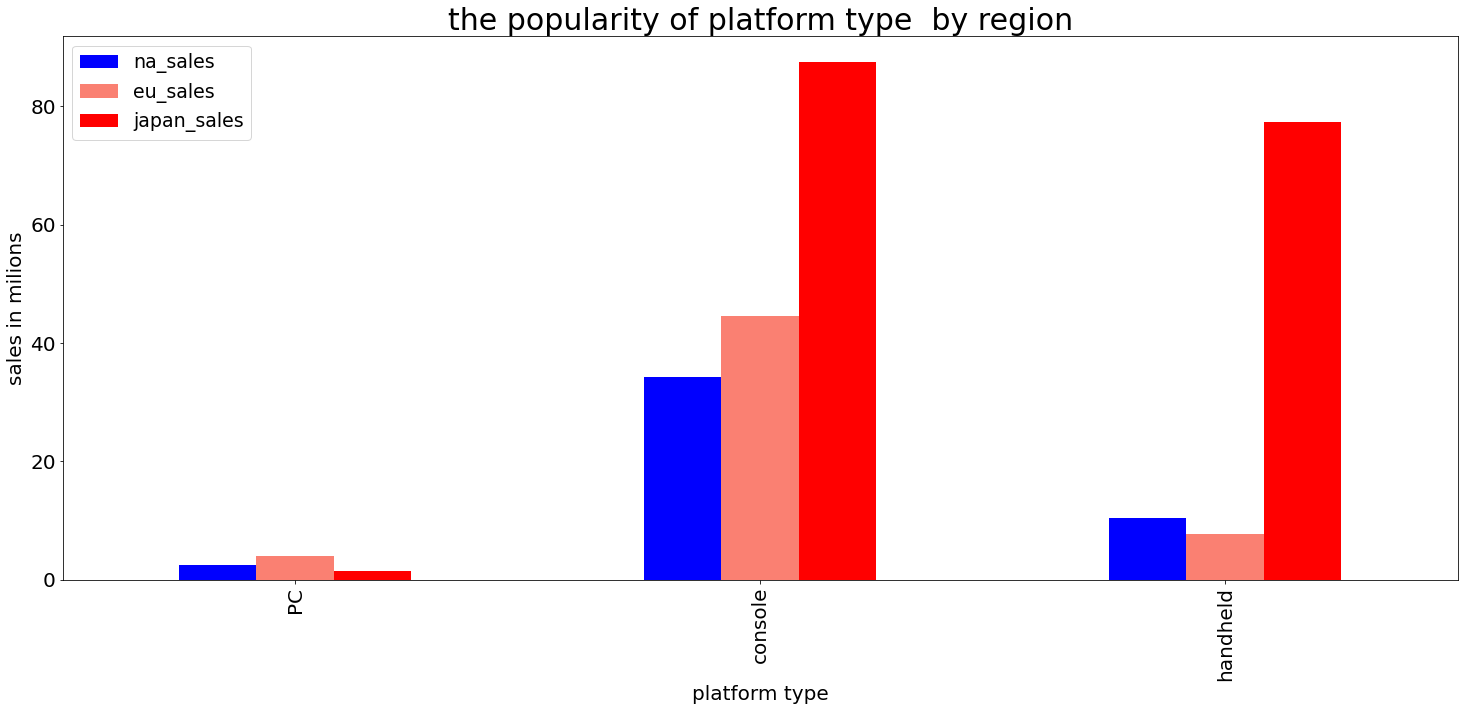

In [41]:
col_na_sales_list = df_n['na_sales'].tolist()
col_eu_sales_list = df_n['eu_sales'].tolist()
col_japan_sales_list = df_n['japan_sales'].tolist()
platform_type_to_list = df_n.index.values.tolist()


dff = pd.DataFrame({'na_sales': col_na_sales_list,
                   'eu_sales': col_eu_sales_list,
                  'japan_sales':col_japan_sales_list }, index = platform_type_to_list)
ax = dff.plot.bar(title = 'the popularity of platform type  by region',figsize=(25,10),fontsize=20, color = {'na_sales':'blue','eu_sales':'salmon','japan_sales':'red'})
ax.title.set_size(30)
plt.xlabel('platform type',fontsize=20)
plt.ylabel('sales in milions',fontsize=20)
plt.legend(fontsize=19)

אפשר לראות שהיפנים עפים על משחקים שצריך לזוז ולא לשבת כמו עציץ לעומת האמריקאים והאירופאיים שמעדיפים לשחק בישיבה ולתקוע מקדולנדס תוך כדי


(0.0, 1350.0)

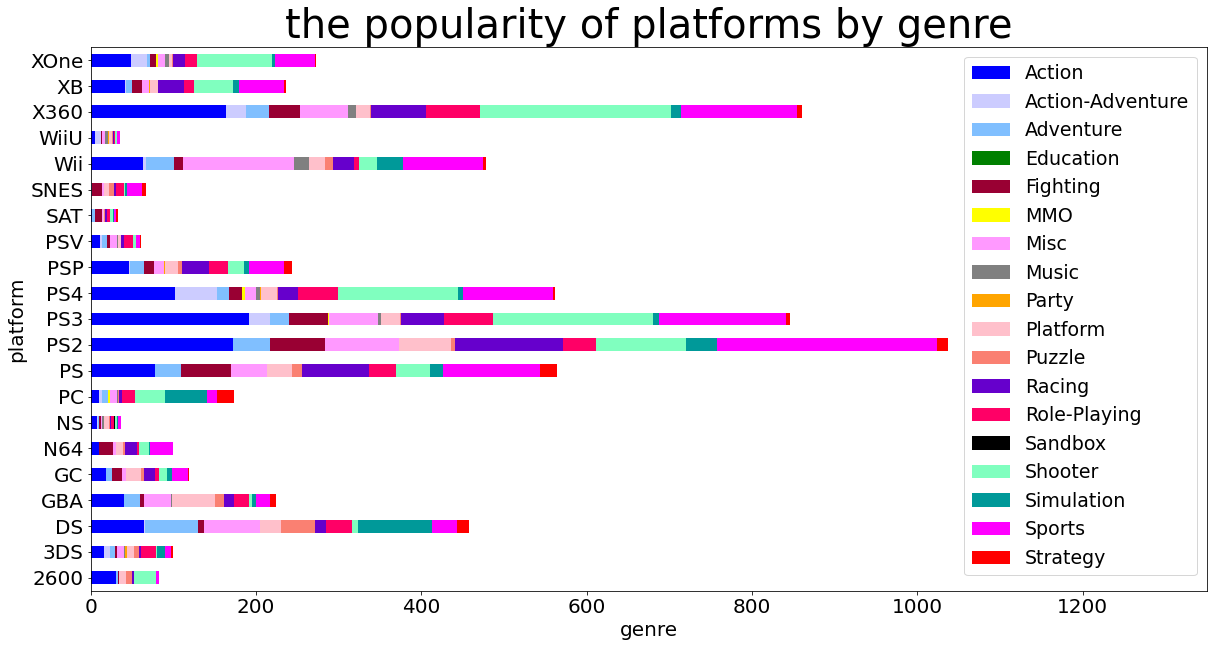

In [39]:
top_consoles\
    .groupby(["platform", "genre"])\
    .sum()["total_sales"]\
    .unstack("genre")\
    .fillna(0)\
    .plot.barh(stacked=True,figsize=(20,10),fontsize=20,title = 'the popularity of platforms by genre',color = ['blue','#ccccff','#80bfff',
                                                                                            'green','#990033', 'yellow','#ff99ff','grey','orange',
                                                                                            'pink','salmon','#6600cc','#ff0066','black','#80ffbf',
                                                                                            '#009999','Fuchsia','red','Aqua','#cc9900','#ccff66']).title.set_size(40)
plt.xlabel('genre',fontsize=20)
plt.ylabel('platform',fontsize=20)
plt.legend(fontsize=19)
plt.xlim(0,1350)

Here are our games' genre breakdowns by platform. We can see Action and Sports games make up a lot of our PS2 games.

In [31]:
top_publishers = df.groupby("developer").count()["total_sales"].sort_values(ascending=False).head(10)
top_publishers = df[df["developer"].isin(top_publishers.keys())]

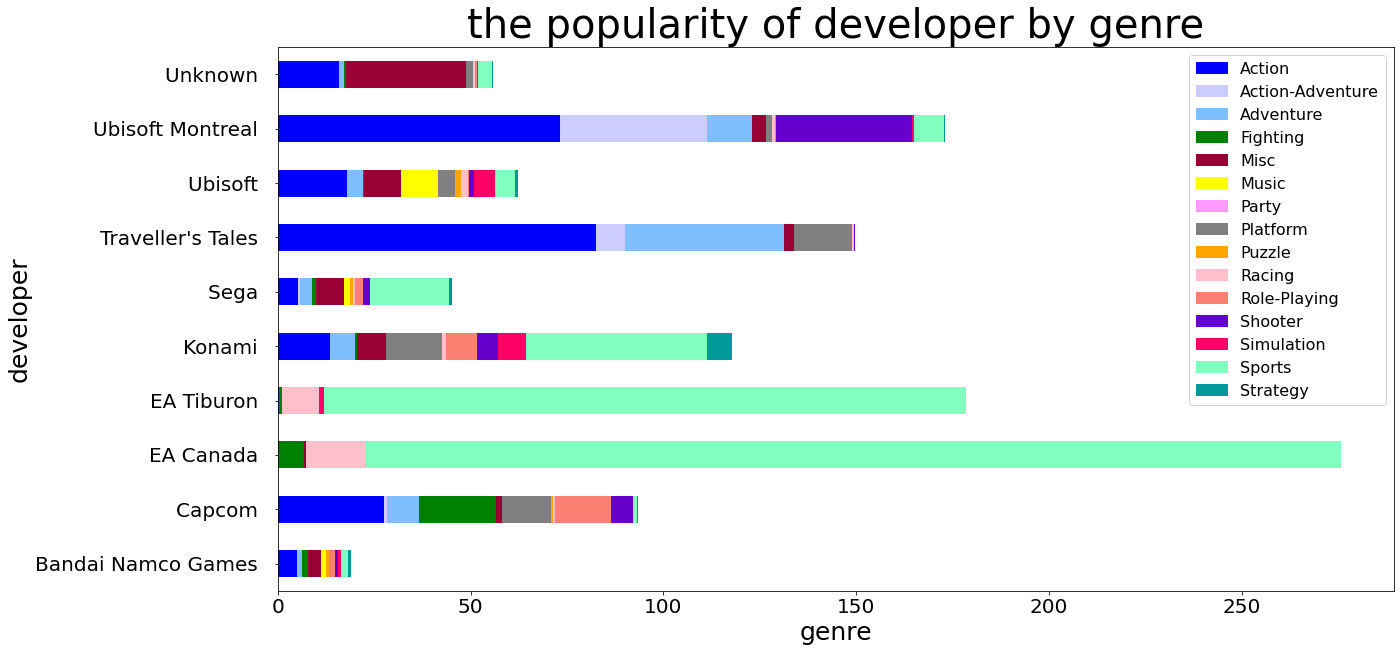

In [40]:
top_publishers.groupby(["developer", "genre"])\
    .sum()["total_sales"]\
    .unstack("genre")\
    .fillna(0)\
    .plot.barh(stacked=True, figsize=(20,10),fontsize=20, title = 'the popularity of developer by genre',color = ['blue','#ccccff','#80bfff',
                                                                                            'green','#990033', 'yellow','#ff99ff','grey','orange',
                                                                                            'pink','salmon','#6600cc','#ff0066','#80ffbf',
                                                                                            '#009999','Fuchsia','red','Aqua','#cc9900','#ccff66']).title.set_size(40)
plt.xlabel('genre',fontsize=25)
plt.ylabel('developer',fontsize=25)
plt.legend(fontsize=16)

Again while our plot is difficult to read, we can see a lot of good information here. These stacked bars are not based off game counts but rather total sales. If a developer has a large stack, we can infer that the developer is known for that genre of game; for example EA Canada has a large red colored stack, indicating it sells a lot of Platform games.

Electronic Arts has a second large red stack indicating it sells a lot of Sports games.


In [33]:
tp = top_publishers.groupby("developer")["total_sales"]

[Text(0, 0, 'Ubisoft  '),
 Text(1, 0, 'Bandai Namco Games  '),
 Text(2, 0, 'Sega  '),
 Text(3, 0, 'Unknown  '),
 Text(4, 0, 'Ubisoft Montreal  '),
 Text(5, 0, "Traveller's Tales  "),
 Text(6, 0, 'Capcom  '),
 Text(7, 0, 'Konami  '),
 Text(8, 0, 'EA Canada  '),
 Text(9, 0, 'EA Tiburon  ')]

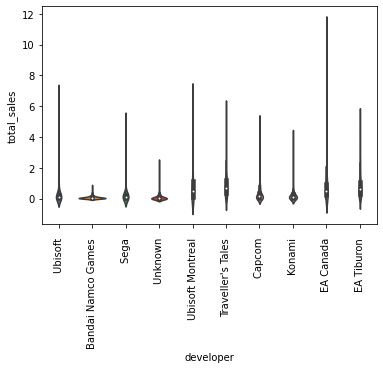

In [34]:
sns.violinplot(x=top_publishers["developer"], y=top_publishers["total_sales"])\
    .set_xticklabels(top_publishers["developer"].unique(), rotation = "vertical")

In [37]:
# יוצרים טבלה רק זאנר ומכירות
copy_of_data = df.copy()
data_by_genre = [copy_of_data['genre'],copy_of_data['total_sales'].astype(float)
                 ,copy_of_data['na_sales'].astype(float)
                 ,copy_of_data['eu_sales'].astype(float)
                 ,copy_of_data['japan_sales'].astype(float)
                 ,copy_of_data['other_sales'].astype(float)
                ]
headers = ["genre", "total_sales","na_sales","eu_sales","japan_sales","other_sales"]
sales_and_genres = pd.concat(data_by_genre, axis=1, keys=headers)
# choosing top 100 sales for each genre

df1 = sales_and_genres.sort_values('japan_sales',ascending = True).groupby('genre').tail(100)
df1


,genre,total_sales,na_sales,eu_sales,japan_sales,other_sales
22,Music,0.61,0.42,0.13,0.01,0.06
23,Music,0.60,0.29,0.25,0.01,0.05
24,Music,0.57,0.41,0.06,0.01,0.10
25,Music,0.55,0.15,0.34,0.01,0.06
26,Music,0.54,0.36,0.13,0.01,0.05
...,...,...,...,...,...,...
14422,Role-Playing,5.35,1.75,1.23,1.87,0.51
9978,Sports,2.05,0.01,0.01,2.05,0.01
9968,Sports,2.20,0.15,0.01,2.05,0.01
9927,Sports,2.79,0.29,0.20,2.13,0.18


In [38]:
# מחברים שורות שיש בהן את אותו הזאנר ומחברים את המכירות
df = df1.groupby('genre').agg({'na_sales':'sum',
                                           'eu_sales':'sum','japan_sales':'sum'})
df

,na_sales,eu_sales,japan_sales
genre,,,
Action,56.20,51.01,36.48
Action-Adventure,30.42,35.45,5.56
Adventure,14.33,10.60,22.61
Education,0.08,0.01,0.01
Fighting,14.55,10.68,38.02
MMO,4.06,3.05,1.54
Misc,10.32,10.42,34.49
Music,6.04,3.12,6.35
Party,2.72,1.92,1.42


In [39]:

# נוסיף עמודה עם הערך הגבוה בכל שורה
df_max_sales = df.copy()
df_max_sales['max_sales'] = df_max_sales.max(axis=1)

df_max_sales

,na_sales,eu_sales,japan_sales,max_sales
genre,,,,
Action,56.20,51.01,36.48,56.20
Action-Adventure,30.42,35.45,5.56,35.45
Adventure,14.33,10.60,22.61,22.61
Education,0.08,0.01,0.01,0.08
Fighting,14.55,10.68,38.02,38.02
MMO,4.06,3.05,1.54,4.06
Misc,10.32,10.42,34.49,34.49
Music,6.04,3.12,6.35,6.35
Party,2.72,1.92,1.42,2.72


In [40]:
# נוסיף עמודה עם השם של העמודה של האזור ששיך אליו הערך המקסימלי
df_max_sales_region = df_max_sales.copy()
df_max_sales_region['max_region'] = df_max_sales_region.idxmax(axis=1)
df_max_sales_region

,na_sales,eu_sales,japan_sales,max_sales,max_region
genre,,,,,
Action,56.20,51.01,36.48,56.20,na_sales
Action-Adventure,30.42,35.45,5.56,35.45,eu_sales
Adventure,14.33,10.60,22.61,22.61,japan_sales
Education,0.08,0.01,0.01,0.08,na_sales
Fighting,14.55,10.68,38.02,38.02,japan_sales
MMO,4.06,3.05,1.54,4.06,na_sales
Misc,10.32,10.42,34.49,34.49,japan_sales
Music,6.04,3.12,6.35,6.35,japan_sales
Party,2.72,1.92,1.42,2.72,na_sales


In [41]:
col_na_sales = df_max_sales_region['na_sales'].tolist()
col_eu_sales = df_max_sales_region['eu_sales'].tolist()
col_japan_sales = df_max_sales_region['japan_sales'].tolist()
genre = df_max_sales_region.index.values.tolist()

genre


['Action',
 'Action-Adventure',
 'Adventure',
 'Education',
 'Fighting',
 'MMO',
 'Misc',
 'Music',
 'Party',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Sandbox',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy']

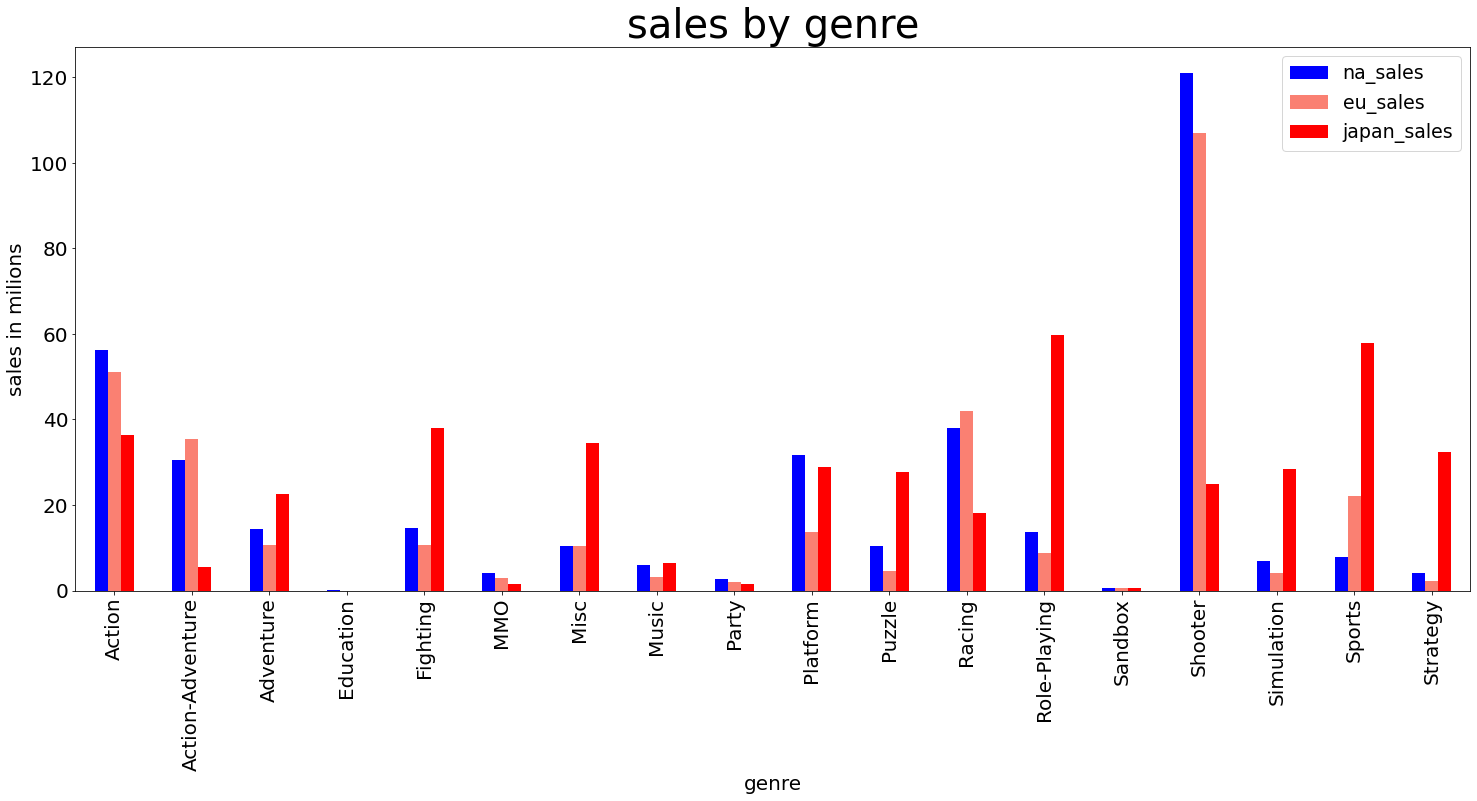

In [42]:
df = pd.DataFrame({'na_sales': col_na_sales,
                   'eu_sales': col_eu_sales,
                  'japan_sales':col_japan_sales }, index = genre)
ax = df.plot.bar(title = 'sales by genre',figsize=(25,10),fontsize=20, color = {'na_sales':'blue','eu_sales':'salmon','japan_sales':'red'})
ax.title.set_size(40)
plt.xlabel('genre',fontsize=20)
plt.ylabel('sales in milions',fontsize=20)
plt.legend(fontsize=19)

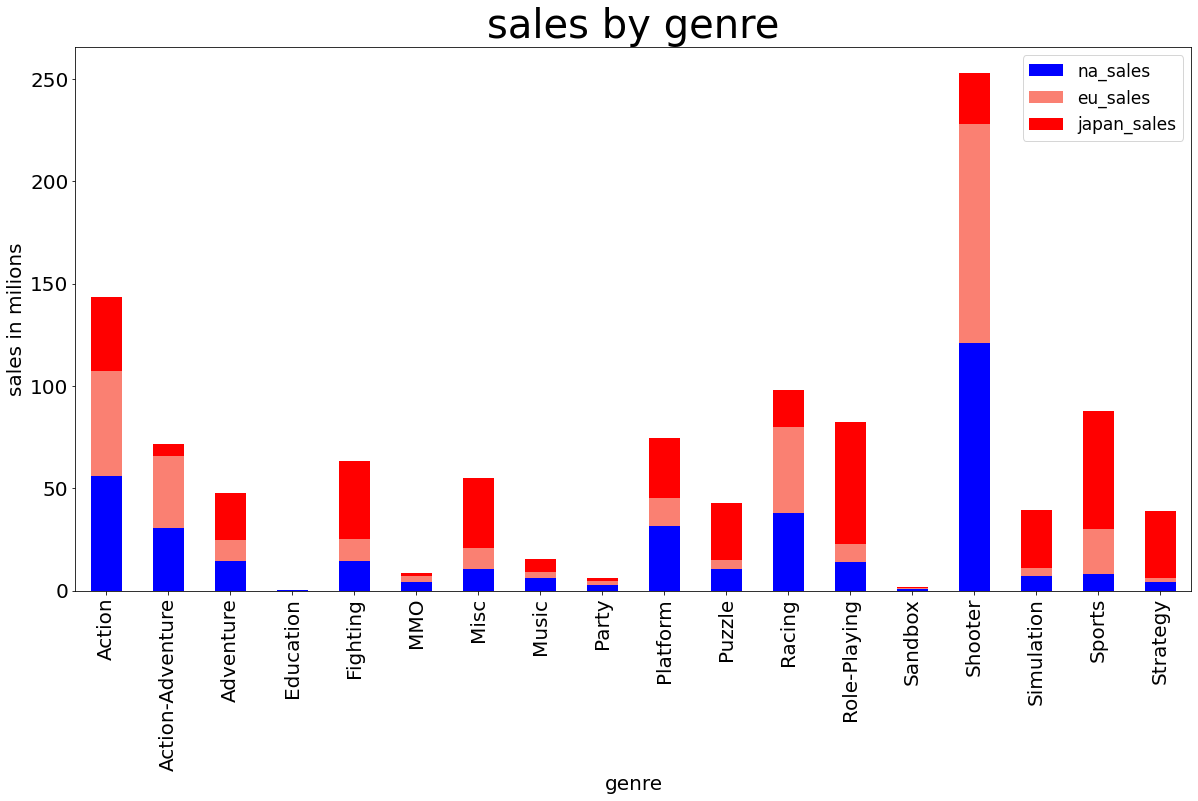

In [43]:
ax = df.plot.bar(title = 'sales by genre',stacked=True,figsize=(20,10),fontsize=20,color = {'na_sales':'blue','eu_sales':'salmon','japan_sales':'red'})
ax.title.set_size(40)
plt.xlabel('genre',fontsize=20)
plt.ylabel('sales in milions',fontsize=20)
plt.legend(fontsize=17)